In [14]:
import sys
import importlib
import pyLDAvis.gensim
import pyLDAvis
import pandas as pd


sys.path.append('./codes')
from codes import LDA 
from codes import classification
import importlib
importlib.reload(LDA)
importlib.reload(classification)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from codes.LDA import LDA_training
from codes.LDA import preprocess_text
from codes.LDA import add_top_words_to_df
from codes.LDA import classification

from codes.classification import add_sentiment_column
from codes.classification import topic_distributions_to_matrix
from codes.classification import train_and_evaluate_classifier
from codes.classification import train_and_evaluate_Random_Forest
from codes.classification import train_test_spliter
from codes.classification import compute_confusion_matrix
from codes.classification import create_cumulative_matrix


In [2]:
df = pd.read_csv('../amazon_data/Amazon_Fashion.csv')

## Making well-balanced data - small

In [3]:
data = df[~df["text"].isna()]
data = data[data['text'].apply(lambda x: len(str(x).split()) > 10)]
sampled_per_rating = [data[data['rating'] == rating].sample(n=1000, random_state=42) for rating in range(1, 6)]
required_samples = pd.concat(sampled_per_rating, axis=0)
remaining_samples = data.drop(required_samples.index).sample(n=10000 - len(required_samples), random_state=42)
data = pd.concat([required_samples, remaining_samples], axis=0)
data = data[data['text'].apply(lambda x: len(str(x).split()) > 10)]
print(data['rating'].value_counts())

rating
5.0    3491
4.0    1808
1.0    1708
3.0    1568
2.0    1425
Name: count, dtype: int64


In [4]:
texts_bow, dictionary, id2token = preprocess_text(data, with_certain_words_removal=True)

---Preprocessing starting ---
---Tokenization done---
---Numbers removed---
---Two letter words removed---
---Written-out numbers removed---
---Verbs removed SMALL---
---Lematization done---
---Stopwords removed---
---Choosed words removed---
---Bigrams done---
---Preprocessing done---


In [5]:
model, dictionary = LDA_training(data, False,9, 100, 20, 200, 1, 10, texts_bow, dictionary, id2token)

--- LDA starting ---
--- LDA finished ---
Medium koherence of topics: -2.5958.
Topic 0: quality, price, cheap, medium, piece, worth, ever, hand, cool, wrist
Topic 1: well, also, back, pretty, still, product, look, first, around, review
Topic 2: gift, strap, side, without, front, best, fine, high, sunglass, face
Topic 3: comfortable, perfect, love, beautiful, thing, black, true, true_size, necklace, wish
Topic 4: could, enough, earring, foot, another, think, never, bracelet, son, hole
Topic 5: nice, pair, soft, year, pocket, daughter, old, month, light, sure
Topic 6: great, really, little, time, much, long, band, fabric, feel, short
Topic 7: size, would, color, small, material, cute, even, day, way, large
Topic 8: fit, good, top, super, definitely, bite, perfectly, tight, money, good_quality


In [10]:
data_with_sentiment = add_sentiment_column(data)
feature_matrix = topic_distributions_to_matrix(model, texts_bow, 9)
labels = data_with_sentiment['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_spliter(feature_matrix, labels)

In [11]:
modelR, y_pred = train_and_evaluate_Random_Forest(feature_matrix, labels, X_train, X_test, y_train, y_test)

---Random Forest Training ---
Accuracy for Random Forest: 0.5140
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.41      0.34      0.37       630
           1       0.15      0.04      0.06       299
           2       0.58      0.75      0.65      1071

    accuracy                           0.51      2000
   macro avg       0.38      0.38      0.36      2000
weighted avg       0.46      0.51      0.47      2000





In [55]:
df_with_words = add_top_words_to_df(classification(data, model, texts_bow), model, 8)
df_see = df_with_words[['rating', 'text','top_words', 'assigned_topic']]

--Classification starting---


# Classification


In [65]:
data_with_sentiment = add_sentiment_column(data)

In [66]:
feature_matrix = topic_distributions_to_matrix(model, texts_bow, 9)

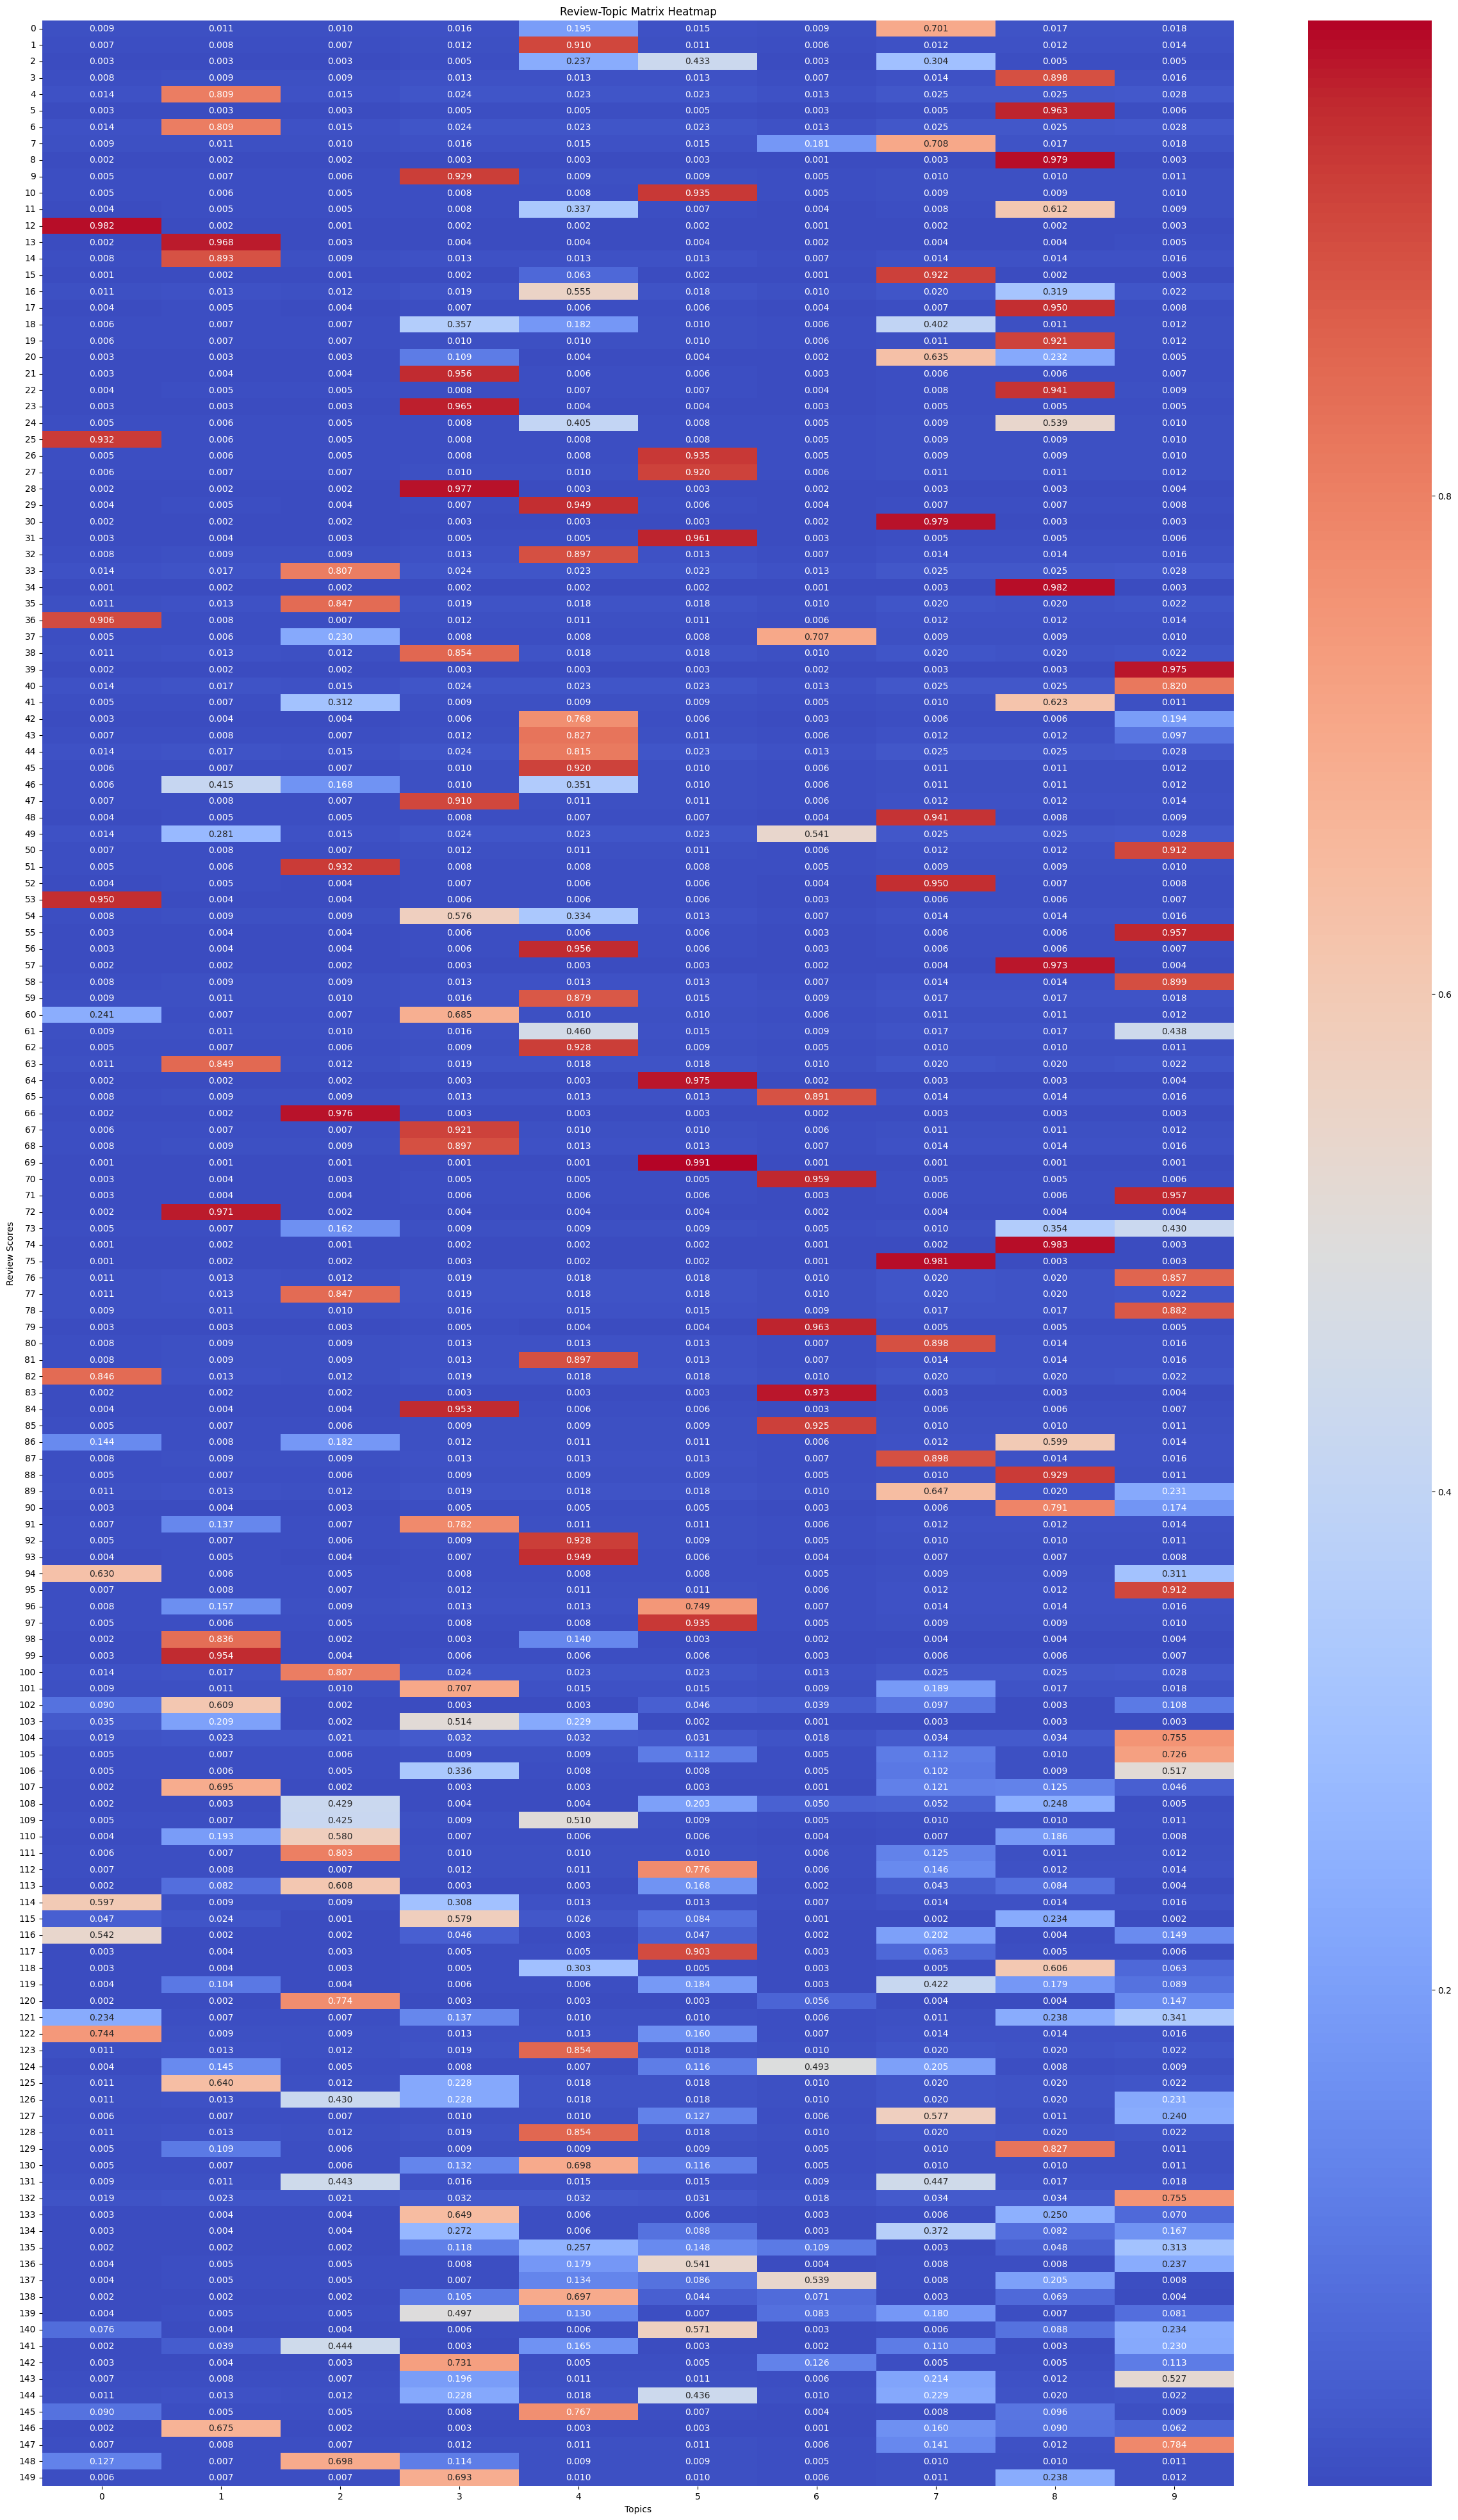

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 50))
sns.heatmap(feature_matrix, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Review-Topic Matrix Heatmap")
plt.xlabel("Topics")
plt.ylabel("Review Scores")
plt.show()

In [67]:
labels = data_with_sentiment['sentiment_encoded']

In [80]:
modelR, y_pred = train_and_evaluate_Random_Forest(feature_matrix, labels)

---Random Forest Training ---
Accuracy for Random Forest: 0.4286
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.51      0.33      0.40        58
           1       0.00      0.00      0.00        28
           2       0.41      0.76      0.53        54

    accuracy                           0.43       140
   macro avg       0.31      0.36      0.31       140
weighted avg       0.37      0.43      0.37       140





In [45]:
import numpy as np
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))


{0: 162, 1: 72, 2: 266}


In [81]:
X_train, X_test, y_train, y_test = train_test_spliter(feature_matrix, labels)

In [84]:
metrics = compute_confusion_matrix(y_test, y_pred, 3)

In [85]:
for cls, metric in metrics.items():
    print(f"Class {cls}: {metric}")

Class 0: {'TP': 19, 'FP': 18, 'FN': 39, 'TN': 64}
Class 1: {'TP': 0, 'FP': 3, 'FN': 28, 'TN': 109}
Class 2: {'TP': 41, 'FP': 59, 'FN': 13, 'TN': 27}


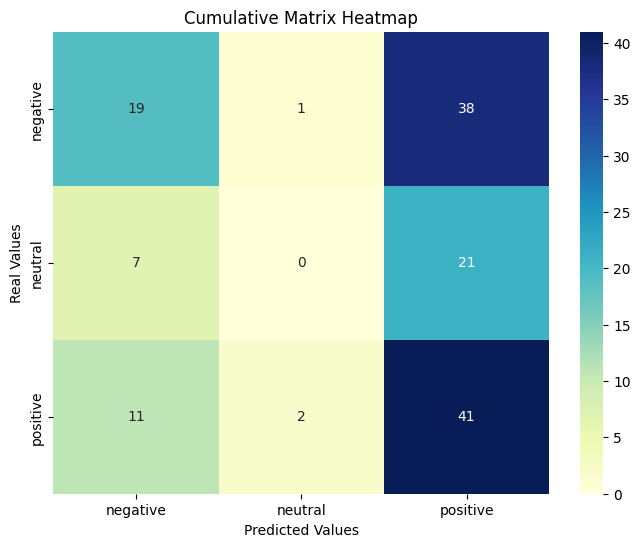

In [99]:
matrix = create_cumulative_matrix(y_test, y_pred, 3)

checking removing the 3 star reviews

In [17]:
data2 = data[data["rating"]!=3]
print(data2['rating'].value_counts())

rating
5.0    3491
4.0    1808
1.0    1708
2.0    1425
Name: count, dtype: int64


In [ ]:
texts_bow, dictionary, id2token = preprocess_text(data2, with_certain_words_removal=True)

c:\Users\User\Desktop\INŻYNIERKA\Diploma-Project-Sentiment-analysis-based-on-products-reviews\codes\LDA.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].fillna('')  # Replace NaN with empty strings
c:\Users\User\Desktop\INŻYNIERKA\Diploma-Project-Sentiment-analysis-based-on-products-reviews\codes\LDA.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].fillna('')  # Replace NaN with empty strings


---Preprocessing starting ---
---Tokenization done---
---Numbers removed---
---Two letter words removed---
---Written-out numbers removed---


In [120]:
model, dictionary = LDA_training(data2, False,9, 100, 20, 200, 1, 10, texts_bow, dictionary, id2token)

--- LDA starting ---
--- LDA finished ---
Medium koherence of topics: -4.6847.
Topic 0: soft, bracelet, quality, well, design, charm, jewelry, really, thing, leather
Topic 1: size, large, well, material, fit, small, real, would, medium, brand
Topic 2: great, little, nice, good, quality, fabric, big, cheap, price, still
Topic 3: bite, tight, good, beautiful, strap, enough, daughter, inch, also, price
Topic 4: perfect, definitely, necklace, silver, probably, together, boot, maybe, gold, string
Topic 5: fit, color, comfortable, pretty, much, love, look, product, would, top
Topic 6: really, cute, super, year, day, pair, easy, old, could, thing
Topic 7: size, band, long, short, around, gift, perfectly, also, would, style
Topic 8: first, week, time, zipper, new, great, part, without, area, problem


In [121]:
data_with_sentiment = add_sentiment_column(data2)

In [122]:
data_with_sentiment['rating'].value_counts()

rating
5.0    201
4.0    128
1.0    125
2.0    121
Name: count, dtype: int64

In [123]:
feature_matrix = topic_distributions_to_matrix(model, texts_bow, 9)

In [124]:
labels = data_with_sentiment['sentiment_encoded']

In [125]:
labels.value_counts()

sentiment_encoded
2    329
0    246
Name: count, dtype: int64

In [128]:
modelR,X_train, X_test, y_train, y_test, y_pred = train_and_evaluate_Random_Forest(feature_matrix, labels)

---Random Forest Training ---
Accuracy for Random Forest: 0.5304
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.48      0.46      0.47        52
           2       0.57      0.59      0.58        63

    accuracy                           0.53       115
   macro avg       0.52      0.52      0.52       115
weighted avg       0.53      0.53      0.53       115





In [148]:
matrix = create_cumulative_matrix(y_test, y_pred, 2)

IndexError: index 2 is out of bounds for axis 1 with size 2